In [258]:
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [259]:
df = pd.read_csv("C:/Users/csrak/Desktop/python/RIVING-Tools/Data/Chile/Database_Chile_Since_03-2013.csv")

In [260]:
df.columns

Index(['revenue', 'net profit', 'operating profit', 'non-controlling profit',
       'eps', 'operating-eps', 'interest revenue', 'cash from sales',
       'cash from yield', 'cash from rent', 'cash to payments',
       'cash to other payments', 'speculation cash', 'current payables',
       'cost of sales', 'ebit', 'depreciation', 'interest', 'cash',
       'current assets', 'liabilities', 'marketable securities',
       'current other assets', 'provisions for employees',
       'non-current assets', 'goodwill', 'intangible assets', 'assets',
       'current liabilities', 'equity', 'shares', 'inventories',
       'shares authorized', 'net operating cashflows',
       'net investing cashflows', 'net financing cashflows',
       'bank: non-banking investing cashflow',
       'bank: banking investing cashflow', 'payment for supplies',
       'payment to employees', 'property sales (operating)', 'dividends paid',
       'forex', 'trade receivables', 'prepayments', 'cash on hands',
       '

In [261]:
df.Date = pd.to_datetime(df.Date, format='%Y%m')

In [262]:
df = df.set_index(df.Date)

In [263]:
#df.loc[df.index.duplicated(), :]

In [1002]:
df.head(10)

,revenue,net profit,operating profit,non-controlling profit,eps,operating-eps,interest revenue,cash from sales,cash from yield,cash from rent,...,forex,trade receivables,prepayments,cash on hands,cash on banks,cash short investment,employee benefits,Date,TICKER,code
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-01,5.731130e+08,6.145100e+07,6.145100e+07,-1.450000e+05,NaN,NaN,NaN,5.550890e+08,NaN,NaN,...,-6524000.0,2.563000e+08,NaN,NaN,1.984770e+08,1.039540e+08,2.471600e+07,2013-03-01,AESANDES,AESANDES201303-1
2013-03-01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,12.00,12.00,1.200000e+01,1.000000e+01,12.0,12.0,...,10.0,1.000000e+01,12.0,12.0,1.000000e+01,1.000000e+01,1.000000e+01,2013-03-01,AESANDES,AESANDES201303-2
2013-03-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.00,0.00,0.000000e+00,1.000000e+00,0.0,0.0,...,1.0,1.000000e+00,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,2013-03-01,AESANDES,AESANDES201303-3
2013-03-01,1.082839e+11,3.907631e+10,3.907631e+10,8.710920e+08,6.24,6.24,1.712902e+09,1.285268e+11,265109000.0,NaN,...,NaN,8.472680e+10,373424000.0,NaN,3.129834e+09,NaN,9.492724e+09,2013-03-01,AGUAS-A,AGUAS-A201303-1
2013-03-01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.00,10.00,1.000000e+01,1.000000e+01,10.0,12.0,...,12.0,1.000000e+01,10.0,12.0,1.000000e+01,1.200000e+01,1.000000e+01,2013-03-01,AGUAS-A,AGUAS-A201303-2
2013-03-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2013-03-01,AGUAS-A,AGUAS-A201303-3
2013-03-01,1.082839e+11,3.907631e+10,3.907631e+10,8.710920e+08,6.24,6.24,1.712902e+09,1.285268e+11,265109000.0,NaN,...,NaN,8.472680e+10,373424000.0,NaN,3.129834e+09,NaN,9.492724e+09,2013-03-01,AGUAS-B,AGUAS-B201303-1
2013-03-01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.00,10.00,1.000000e+01,1.000000e+01,10.0,12.0,...,12.0,1.000000e+01,10.0,12.0,1.000000e+01,1.200000e+01,1.000000e+01,2013-03-01,AGUAS-B,AGUAS-B201303-2
2013-03-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2013-03-01,AGUAS-B,AGUAS-B201303-3


In [1003]:
grouped = df.groupby(df.TICKER)

In [1004]:
tickers = df.TICKER.unique() 
tickers

array(['AESANDES', 'AGUAS-A', 'AGUAS-B', 'ALMENDRAL', 'ANASAC', 'ANDACOR',
       'ANDINA-A', 'ANDINA-B', 'ANTARCHILE', 'AQUACHILE', 'ATSA',
       'AXXION', 'AZUL AZUL', 'BANVIDA', 'BESALCO', 'BICECORP', 'BLUMAR',
       'BOLSASTGO', 'CALICHERAA', 'CALICHERAB', 'CAMANCHACA', 'CAMPOS',
       'CANALISTAS', 'CAP', 'CAROZZI', 'CASABLANCA', 'CCU', 'CEMENTOS',
       'CENCOSUD', 'CIC', 'CINTAC', 'CLUBUNION', 'CMPC', 'COLBUN',
       'COLO COLO', 'COLOSO', 'CONCHATORO', 'COPEC', 'COPEVAL',
       'COVADONGA', 'CRISTALES', 'CRUZADOS', 'CTC', 'DUNCANFOX', 'ECL',
       'EDELMAG', 'EDELPA', 'EISA', 'ELECMETAL', 'EMBONOR-A', 'EMBONOR-B',
       'EMILIANA', 'ENAEX', 'ENELAM', 'ENELGXCH', 'ENJOY', 'ENLASA',
       'ENTEL', 'ESPANOLA', 'ESPANOLVAL', 'ESSBIO-A', 'ESSBIO-B',
       'ESSBIO-C', 'ESTACIONAM', 'FALABELLA', 'FEPASA', 'FERIAOSOR',
       'FORUS', 'FOSFOROS', 'FROWARD', 'GASCO', 'HF', 'HIPERMARC',
       'HIPICO', 'HIPODROMOA', 'HIPODROMOB', 'HITES', 'HORNOS', 'IACSA',
       'IAM', 'IANS

In [1005]:
sample1 = grouped.get_group("ANDINA-A")

In [1006]:
sample1.loc[sample1.index.duplicated(), :]

,revenue,net profit,operating profit,non-controlling profit,eps,operating-eps,interest revenue,cash from sales,cash from yield,cash from rent,...,forex,trade receivables,prepayments,cash on hands,cash on banks,cash short investment,employee benefits,Date,TICKER,code
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-01,10.0,10.0,12.0,10.0,12.0,12.0,10.0,10.0,12.0,12.0,...,10.0,10.0,10.0,12.0,10.0,10.0,10.0,2013-03-01,ANDINA-A,ANDINA-A201303-2
2013-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-03-01,ANDINA-A,ANDINA-A201303-3
2014-03-01,10.0,10.0,10.0,10.0,12.0,12.0,10.0,10.0,12.0,12.0,...,10.0,10.0,10.0,12.0,10.0,10.0,10.0,2014-03-01,ANDINA-A,ANDINA-A201403-2
2014-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-03-01,ANDINA-A,ANDINA-A201403-3
2015-03-01,11.0,11.0,11.0,11.0,12.0,12.0,12.0,11.0,12.0,12.0,...,11.0,10.0,10.0,12.0,10.0,10.0,11.0,2015-03-01,ANDINA-A,ANDINA-A201503-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-01,ANDINA-A,ANDINA-A201912-3
2020-12-01,11.0,11.0,11.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0,...,11.0,10.0,12.0,12.0,10.0,10.0,11.0,2020-12-01,ANDINA-A,ANDINA-A202012-2
2020-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-01,ANDINA-A,ANDINA-A202012-3


In [1007]:
sample1.asfreq('Q')

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
sample1.Date= pd.to_datetime(sample1.Date, format='%Y%m')

In [ ]:
sample1

In [ ]:
steps = 36
data_train = sample1[:-steps-6]
data_test  = sample1[-steps-6:-6]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

In [ ]:
fig, ax=plt.subplots(figsize=(9, 4))
data_train['net operating cashflows'].plot(ax=ax, label='train')
data_test['net operating cashflows'].plot(ax=ax, label='test')
ax.legend();

In [786]:
data_train

[                 revenue    net profit  non-controlling profit  \
 Date                                                             
 2013-03-31  4.942490e+11  5.299495e+10           -1.250471e+08   
 2013-06-30  5.258281e+11  3.811349e+10           -5.545191e+08   
 2013-09-30  4.660065e+11  4.318091e+10           -3.268472e+08   
 2013-12-31  4.498090e+11  3.691045e+10           -1.411738e+09   
 2014-03-31  4.821073e+11  1.802403e+10           -2.070607e+09   
 2014-06-30  5.397126e+11  3.866369e+10           -9.236235e+08   
 2014-09-30  5.256134e+11  5.985270e+10           -2.654448e+09   
 2014-12-31  4.605691e+11  3.428877e+10           -1.901578e+09   
 2015-03-31  4.592548e+11  4.163205e+10           -2.634612e+09   
 2015-06-30  4.661056e+11  2.654189e+10           -9.986518e+08   
 2015-09-30  5.106051e+11  8.954923e+10           -4.160187e+09   
 2015-12-31  4.314676e+11  6.018127e+10           -2.727751e+09   
 2016-03-31  4.791640e+11  3.451730e+10           -1.774806e+0

In [787]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 8
                )

forecaster.fit(y=data_train['net operating cashflows'])
forecaster

TypeError: list indices must be integers or slices, not str

In [22]:
from pandas.tseries.offsets import MonthEnd


## Separate Files


In [287]:
import glob

In [288]:
param = 'net operating cashflows'

In [289]:
#df_1 = pd.read_csv('C:/Users/csrak/Desktop/python/RIVING-Tools/databases/ELUXSA_datab.csv')
files = []
columns_to_ignore = []
for fil in glob.glob('C:/Users/csrak/Desktop/python/RIVING-Tools/databases/*.csv'):
    files.append(pd.read_csv(fil))
    if files[-1].shape[0] <23:
        files.pop(-1)
        continue
    count = 0
    temp_columns_to_ignore =[]
    for col in files[-1].columns:
        if (files[-1][col].shape[0]-files[-1][col].isna().sum())<12:
            if col not in columns_to_ignore:
                temp_columns_to_ignore.append(col)
            count+=1
    if count >10:
        files.pop(-1)
    else:
        columns_to_ignore = columns_to_ignore+temp_columns_to_ignore
        


In [290]:
files[0].head()

,Unnamed: 0,Date,revenue,net profit,operating profit,non-controlling profit,eps,operating-eps,interest revenue,cash from sales,...,payment to employees,property sales (operating),dividends paid,forex,trade receivables,prepayments,cash on hands,cash on banks,cash short investment,employee benefits
0,0,201303,4.942490e+11,5.299495e+10,5.299495e+10,-1.250471e+08,NaN,NaN,NaN,4.787052e+11,...,1.015813e+10,148331699.2,NaN,-5.626256e+09,2.210315e+11,NaN,NaN,1.711653e+11,8.964926e+10,2.131492e+10
1,1,201306,5.258281e+11,3.811349e+10,3.811349e+10,-5.545191e+08,NaN,NaN,NaN,1.000905e+12,...,2.322685e+10,37945318.4,NaN,-8.692065e+09,2.220025e+11,NaN,NaN,1.296574e+11,4.678916e+10,2.236790e+10
2,2,201309,4.660065e+11,4.318091e+10,4.318091e+10,-3.268472e+08,NaN,NaN,NaN,6.252811e+11,...,1.558087e+10,110386380.8,NaN,-2.229287e+09,1.974157e+11,NaN,NaN,9.997815e+10,4.233490e+10,2.113037e+10
3,3,201312,4.498090e+11,3.691045e+10,3.691045e+10,-1.411738e+09,NaN,NaN,2.808816e+09,3.847612e+11,...,1.119387e+10,3449574.4,NaN,-4.002369e+09,1.962109e+11,NaN,NaN,1.748607e+11,1.878380e+10,1.838278e+10
4,4,201403,4.821073e+11,1.802403e+10,1.802403e+10,-2.070607e+09,0.0,0.0,2.394005e+09,5.604541e+11,...,7.590788e+09,2587180.8,NaN,-1.561795e+09,2.152215e+11,NaN,NaN,2.337492e+11,2.010584e+10,1.816891e+10


In [291]:
exceptions = [
 'cash from sales',
 'employee benefits',
 'cash short investment',
 'goodwill',
 'property sales (operating)',
 'interest',
 'interest revenue',
 'marketable securities',
 'non-controlling profit',
 'cash to other payments',
 'dividends paid',
 'cash on banks',
 'forex'] ##Manually chosen to be zero

In [292]:
columns_to_ignore = [cols for cols in columns_to_ignore if (cols not in exceptions)]

In [293]:
columns_to_ignore

['cash from yield',
 'cash from rent',
 'speculation cash',
 'bank: non-banking investing cashflow',
 'bank: banking investing cashflow',
 'prepayments',
 'cash on hands',
 'cost of sales',
 'provisions for employees',
 'eps',
 'operating-eps',
 'current other assets']

In [294]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [295]:
for i in range(len(files)):
    for par in columns_to_ignore:
        try:
            files[i].drop(par, axis =1, inplace=True)
        except KeyError:
            print('Column ', par, ' not found in ', i)
    
    

In [296]:
files[0].columns

Index(['Unnamed: 0', 'Date', 'revenue', 'net profit', 'operating profit',
       'non-controlling profit', 'interest revenue', 'cash from sales',
       'cash to payments', 'cash to other payments', 'current payables',
       'ebit', 'depreciation', 'interest', 'cash', 'current assets',
       'liabilities', 'marketable securities', 'non-current assets',
       'goodwill', 'intangible assets', 'assets', 'current liabilities',
       'equity', 'shares', 'inventories', 'shares authorized',
       'net operating cashflows', 'net investing cashflows',
       'net financing cashflows', 'payment for supplies',
       'payment to employees', 'property sales (operating)', 'dividends paid',
       'forex', 'trade receivables', 'cash on banks', 'cash short investment',
       'employee benefits'],
      dtype='object')

In [297]:
to_zero = ['interest revenue','interest', 'cash to other payments', 'marketable securities', 'goodwill','intangible assets','property sales (operating)','dividends paid','forex' , 'employee benefits' ]

In [298]:
for i in range(len(files)):   
    for col in to_zero:
        files[i][col] = files[i][col].fillna(0)
    print("Cleaned columns of ", i)
    count = 0
    for col in files[i].columns:        
        if not is_datetime(files[i][col]):     
            count += 1
            files[i][col].interpolate(option='spline',inplace = True) 
    # for col in files[i].columns:        
    #     if not is_datetime(files[i][col]):     
    #         count += 1
    #         files[i][col].interpolate(option='spline',inplace == True)
    print(" -- ", count)

Cleaned columns of  0
 --  39
Cleaned columns of  1
 --  39
Cleaned columns of  2
 --  39
Cleaned columns of  3
 --  39
Cleaned columns of  4
 --  39
Cleaned columns of  5
 --  39
Cleaned columns of  6
 --  39
Cleaned columns of  7
 --  39
Cleaned columns of  8
 --  39
Cleaned columns of  9
 --  39
Cleaned columns of  10
 --  39
Cleaned columns of  11
 --  39
Cleaned columns of  12
 --  39
Cleaned columns of  13
 --  39
Cleaned columns of  14
 --  39
Cleaned columns of  15
 --  39
Cleaned columns of  16
 --  39
Cleaned columns of  17
 --  39
Cleaned columns of  18
 --  39
Cleaned columns of  19
 --  39
Cleaned columns of  20
 --  39
Cleaned columns of  21
 --  39
Cleaned columns of  22
 --  39
Cleaned columns of  23
 --  39
Cleaned columns of  24
 --  39
Cleaned columns of  25
 --  39
Cleaned columns of  26
 --  39
Cleaned columns of  27
 --  39
Cleaned columns of  28
 --  39
Cleaned columns of  29
 --  39
Cleaned columns of  30
 --  39
Cleaned columns of  31
 --  39
Cleaned columns of

In [299]:
files[8].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  36 non-null     int64  
 1   Date                        36 non-null     int64  
 2   revenue                     36 non-null     float64
 3   net profit                  36 non-null     float64
 4   operating profit            36 non-null     float64
 5   non-controlling profit      36 non-null     float64
 6   interest revenue            36 non-null     float64
 7   cash from sales             36 non-null     float64
 8   cash to payments            36 non-null     float64
 9   cash to other payments      36 non-null     float64
 10  current payables            36 non-null     float64
 11  ebit                        36 non-null     float64
 12  depreciation                36 non-null     float64
 13  interest                    36 non-nu

In [300]:
len(files)

59

In [301]:
files[1].shape

(36, 39)

In [302]:
files[1].columns


Index(['Unnamed: 0', 'Date', 'revenue', 'net profit', 'operating profit',
       'non-controlling profit', 'interest revenue', 'cash from sales',
       'cash to payments', 'cash to other payments', 'current payables',
       'ebit', 'depreciation', 'interest', 'cash', 'current assets',
       'liabilities', 'marketable securities', 'non-current assets',
       'goodwill', 'intangible assets', 'assets', 'current liabilities',
       'equity', 'shares', 'inventories', 'shares authorized',
       'net operating cashflows', 'net investing cashflows',
       'net financing cashflows', 'payment for supplies',
       'payment to employees', 'property sales (operating)', 'dividends paid',
       'forex', 'trade receivables', 'cash on banks', 'cash short investment',
       'employee benefits'],
      dtype='object')

In [303]:
def vec_dt_replace(series, year=None, month=None, day=None):
    return pd.to_datetime(
        {'year': series.dt.year if year is None else year,
         'month': series.dt.month if month is None else month,
         'day': series.dt.day if day is None else day})

In [304]:
#df_1.Date

In [305]:
#vec_dt_replace(df_1.Date, day=31)

In [306]:
#df_1.Date.apply(lambda dt: dt.replace(day=31))

In [307]:
#df_1

In [308]:
for i in range(len(files)):
    files[i].Date = pd.to_datetime(files[i].Date,format="%Y%m")+ MonthEnd(1)
    files[i] = files[i].set_index(files[i].Date)
    files[i]= files[i].asfreq("Q",how="end")
    

In [309]:
initial = len(files)
for i in range(initial):
    if files[initial-1-i][param].isnull().any():
        files.pop(initial-1-i) 
        continue
    #files[initial-1-i].drop('Date', axis =1, inplace=True)
    files[initial-1-i].drop(files[initial-1-i].columns[0], axis =1, inplace=True)

In [310]:
len(files)

59

In [311]:
colss = 8


(df_1.corr().abs().sort_values(df_1.corr().columns[colss], axis = 0, ascending=False))[df_1.corr().columns[colss]]

NameError: name 'df_1' is not defined

In [ ]:
#df_1.shape

In [855]:
data_train = []
data_test = []
for i in range(len(files)):
    steps = 16
    data_train.append(files[i][:-steps].copy())
    data_test.append(files[i][-steps:].copy())

    #print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
    #print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

In [856]:
#data_test[0]['net operating cashflows']

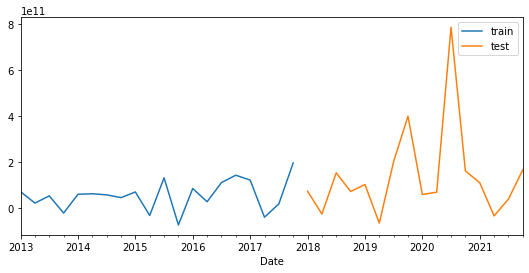

In [857]:
fig, ax=plt.subplots(figsize=(9, 4))
data_train[0]['net operating cashflows'].plot(ax=ax, label='train')
data_test[0]['net operating cashflows'].plot(ax=ax, label='test')
ax.legend();

In [858]:
files[25]

,revenue,net profit,operating profit,non-controlling profit,interest revenue,cash from sales,cash to payments,cash to other payments,current payables,ebit,...,net financing cashflows,payment for supplies,payment to employees,property sales (operating),dividends paid,forex,trade receivables,cash on banks,cash short investment,employee benefits
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-31,3.437883e+09,-310985000.0,-310985000.0,14000.0,0.0,3.401532e+09,2.854797e+09,34263000.0,2.360496e+09,-2.727250e+08,...,-1.652000e+06,2.854797e+09,6.006280e+08,0.000000e+00,0.0,-12102000.0,3.945186e+09,5793000.0,NaN,7.479810e+08
2013-06-30,4.349974e+09,211190000.0,211190000.0,-4000.0,0.0,4.195339e+09,4.023488e+09,48552000.0,2.431078e+09,1.979420e+08,...,4.686430e+08,4.023488e+09,1.008214e+09,0.000000e+00,0.0,-2739000.0,4.470154e+09,3754000.0,NaN,8.012670e+08
2013-09-30,4.085762e+09,165691000.0,165691000.0,-3000.0,0.0,4.436858e+09,5.809391e+09,52248000.0,1.779843e+09,8.674700e+07,...,2.056432e+09,5.809391e+09,5.105540e+08,1.158000e+07,0.0,-5955000.0,7.167304e+09,81276000.0,NaN,8.213740e+08
2013-12-31,4.031543e+09,-28393000.0,-28393000.0,8000.0,33577000.0,4.941302e+09,3.920638e+09,46247000.0,2.683329e+09,-1.720220e+08,...,-1.928000e+06,3.920638e+09,7.676240e+08,3.090292e+09,0.0,-9891000.0,3.788345e+09,38188000.0,2.062553e+09,-2.266999e+09
2014-03-31,4.977022e+09,469255000.0,469255000.0,3000.0,20476000.0,4.458197e+09,4.469150e+09,23500000.0,3.291224e+09,5.743780e+08,...,-2.340000e+06,4.469150e+09,7.269790e+08,0.000000e+00,0.0,-3657000.0,4.689249e+09,269248000.0,1.000789e+09,8.040900e+08
2014-06-30,6.237065e+09,92347000.0,92347000.0,-7000.0,0.0,4.705976e+09,5.288374e+09,66534000.0,2.907304e+09,2.408500e+07,...,-2.510000e+06,5.288374e+09,7.992970e+08,0.000000e+00,0.0,-7269000.0,5.668648e+09,318912000.0,7.011465e+08,9.214670e+08
2014-09-30,4.791865e+09,148194000.0,148194000.0,12000.0,0.0,5.956087e+09,7.020770e+09,57096000.0,2.348043e+09,2.161510e+08,...,2.808309e+09,7.020770e+09,7.303480e+08,2.450000e+05,0.0,10583000.0,4.906019e+09,246111000.0,4.015040e+08,-1.604102e+09
2014-12-31,4.520157e+09,-38308000.0,-38308000.0,15000.0,0.0,5.363356e+09,3.987969e+09,79236000.0,4.370939e+09,-1.557240e+08,...,7.974990e+08,3.987969e+09,7.735930e+08,4.000000e+06,0.0,-4718000.0,4.184116e+09,241871000.0,1.800270e+08,3.390532e+09
2015-03-31,5.389156e+09,341268000.0,341268000.0,8000.0,0.0,5.419005e+09,5.057921e+09,72134000.0,3.964353e+09,5.402890e+08,...,-2.379000e+06,5.057921e+09,9.561890e+08,7.000000e+08,0.0,-10742000.0,4.756039e+09,181383000.0,4.908990e+08,9.407600e+08


In [866]:
for i in range(len(data_train)):
    data_train[i].fillna(method='ffill', inplace = True)
for i in range(len(data_train)):
    data_train[i].fillna(method='bfill', inplace = True)
    data_train[i].fillna(0, inplace=True)
data_train[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2013-03-31 to 2017-12-31
Freq: Q-DEC
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue                     20 non-null     float64
 1   net profit                  20 non-null     float64
 2   operating profit            20 non-null     float64
 3   non-controlling profit      20 non-null     float64
 4   interest revenue            20 non-null     float64
 5   cash from sales             20 non-null     float64
 6   cash to payments            20 non-null     float64
 7   cash to other payments      20 non-null     float64
 8   current payables            20 non-null     float64
 9   ebit                        20 non-null     float64
 10  depreciation                20 non-null     float64
 11  interest                    20 non-null     float64
 12  cash                        20 non-null     float64
 13  curre

In [867]:
skip = [27,52]


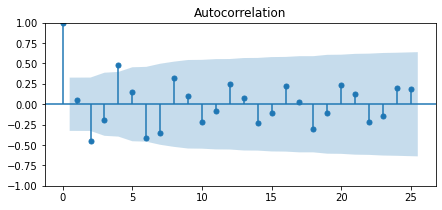

In [868]:
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(files[1][param], ax=ax, lags=25)
plt.show()

In [877]:
#Manually checked as bad data

#data_train.pop(12)
#data_test.pop(12)

In [874]:
#data_train[5].drop(param, 1).info()

In [939]:
forecasters = []
for i in range(len(data_train)):
    if i in skip:
        continue
    forecaster = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags = 8
                    )
    #forecaster.fit(y=data_train[i][param], exog=data_train[i].drop(param, 1) )
    forecaster.fit(y=data_train[i])
    print(i)
    forecasters.append(forecaster)
#forecaster

Exception: `y` must be a pandas Series.

In [773]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

In [311]:

stacking_regressor = StackingRegressor(estimators=forecasters, final_estimator=RidgeCV())


In [329]:
forecasters[0].predict()

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [879]:
from sklearn.ensemble import 

SyntaxError: invalid syntax (1012850834.py, line 1)

In [896]:
class my_ensemble:
    def __init__(self, ensembles, exog = None):
        self.ensembles = ensembles
    def predict(self,last_window, steps = 10,  exog = None):
        res= self.ensembles[0].predict(steps=steps, exog = exog)
        for i in range(1,len(self.ensembles)):
            print(i,end=' ')
            res= res.add(self.ensembles[i].predict(last_window = last_window, steps=steps,  exog = exog), fill_value=0)
        return res/len(self.ensembles)


In [901]:
ens = my_ensemble(forecasters)
num = 2

In [902]:
prediction = ens.predict(last_window = data_train[num][param], exog = data_train[num].drop(param, 1))

C:\Users\csrak\AppData\Local\Temp\ipykernel_32\3392420461.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  prediction = ens.predict(last_window = data_train[num][param], exog = data_train[num].drop(param, 1))


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 

In [382]:
data_train[0].head(2)

,Unnamed: 0,Date,revenue,net profit,operating profit,non-controlling profit,eps,operating-eps,interest revenue,cash from sales,...,payment to employees,property sales (operating),dividends paid,forex,trade receivables,prepayments,cash on hands,cash on banks,cash short investment,employee benefits
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-31,0,2013-03-31,4.942490e+11,5.299495e+10,5.299495e+10,-125047072.0,NaN,NaN,NaN,4.787052e+11,...,1.015813e+10,148331699.2,NaN,-5.626256e+09,2.210315e+11,NaN,NaN,1.711653e+11,8.964926e+10,2.131492e+10
2013-06-30,1,2013-06-30,5.258281e+11,3.811349e+10,3.811349e+10,-554519084.8,NaN,NaN,NaN,1.000905e+12,...,2.322685e+10,37945318.4,NaN,-8.692065e+09,2.220025e+11,NaN,NaN,1.296574e+11,4.678916e+10,2.236790e+10


In [926]:
num = 11

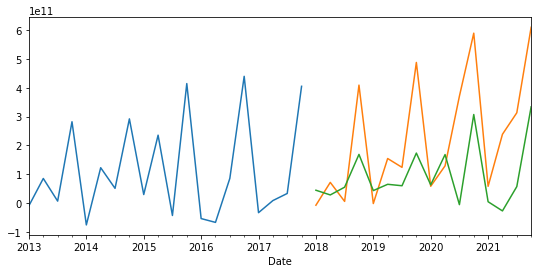

In [927]:
fig, ax = plt.subplots(figsize=(9, 4))
data_train[num][param].plot(ax=ax, label='train')
data_test[num][param].plot(ax=ax, label='test')
prediction = ens.ensembles[num].predict(last_window = data_train[num][param], steps = steps, exog = data_train[num].drop(param, 1))
prediction.plot(ax=ax, label='predictions')
count = 0
#for ensemble in ens.ensembles:
#    pred = ensemble.predict(last_window = data_train[num][param], steps = steps, exog = data_train[num].drop(param, 1))
#    pred.plot(ax=ax, label=str(count))
#    count+=1
#ax.legend()

In [312]:
predictions = stacking_regressor.predict(steps=steps)
predictions.head(5)

AttributeError: This 'StackingRegressor' has no attribute 'predict'

TypeError: list indices must be integers or slices, not str

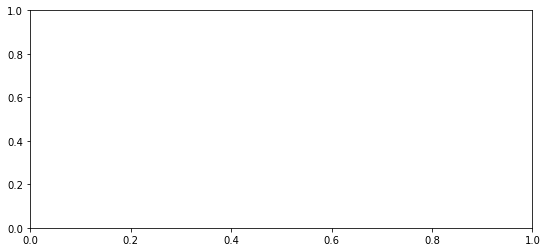

In [300]:
fig, ax = plt.subplots(figsize=(9, 4))
data_train[y].plot(ax=ax, label='train')
data_test[y].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

## PIpeline

In [206]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor

## Keras

In [161]:
files[6].shape
import numpy as np

In [162]:
num = 6

In [163]:
#files[num]["Date"] = files[num].index
#files[num].drop("Date", 1, inplace = True)
#files[num].head(10)

In [165]:
files[num].head()

,revenue,net profit,operating profit,non-controlling profit,interest revenue,cash from sales,cash to payments,cash to other payments,current payables,ebit,...,property sales (operating),dividends paid,forex,trade receivables,cash on banks,cash short investment,employee benefits,month,year,C
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-31,5.156854e+12,2.186918e+11,2.157131e+11,9.509011e+10,1.144396e+10,5.471051e+12,5.077454e+12,6.709853e+10,1.447046e+12,2.641098e+11,...,2.793293e+10,6.097985e+09,-2.080180e+10,1.525159e+12,2.777640e+11,3.398564e+11,0.0,3,2013,0.0
2013-06-30,5.345053e+12,2.224260e+11,2.003901e+11,9.772989e+10,1.345679e+10,5.687978e+12,5.045970e+12,8.223699e+10,1.382815e+12,2.636855e+11,...,-1.021936e+09,1.511466e+11,-2.515343e+10,1.712752e+12,3.012591e+11,3.398564e+11,0.0,6,2013,1.0
2013-09-30,5.420233e+12,2.061750e+11,2.062690e+11,9.784977e+10,1.015555e+10,5.636533e+12,5.047735e+12,7.605104e+10,1.307368e+12,2.580954e+11,...,4.237802e+09,2.235410e+10,2.298020e+10,1.590237e+12,2.755365e+11,3.889024e+11,0.0,9,2013,2.0
2013-12-31,5.073666e+12,6.193021e+10,6.448721e+10,2.304143e+10,9.450109e+09,5.846435e+12,5.189767e+12,6.564713e+10,1.543340e+12,1.226600e+11,...,8.077610e+10,4.403123e+10,-4.644076e+10,1.589435e+12,3.752309e+11,3.212192e+11,0.0,12,2013,3.0
2014-03-31,5.191192e+12,3.198902e+11,3.198902e+11,1.341764e+11,9.908902e+09,5.358277e+12,5.097873e+12,3.848949e+10,1.505017e+12,4.363660e+11,...,1.146035e+10,1.927450e+09,-1.408116e+10,2.007570e+12,3.155929e+11,3.286737e+11,0.0,3,2014,4.0


In [312]:
for nums in range(len(files)):
    files[nums]['month'] = files[nums].index.month
    files[nums]['year'] = files[nums].index.year
    
    files[nums]['C'] = np.arange(len(files[nums]))/1.0

    for col in files[nums].columns:
        files[nums].fillna(method="ffill", inplace=True)
        files[nums].fillna(method="bfill", inplace=True)
    files[nums].drop("Date", 1,inplace = True)

In [313]:
files[num].head()

,revenue,net profit,operating profit,non-controlling profit,interest revenue,cash from sales,cash to payments,cash to other payments,current payables,ebit,...,property sales (operating),dividends paid,forex,trade receivables,cash on banks,cash short investment,employee benefits,month,year,C
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-31,2.912702e+10,8.188400e+07,8.188400e+07,1.012000e+06,0.0,4.154228e+10,3.107924e+10,2.117781e+09,1.969937e+10,-2.787300e+07,...,30689000.0,0.0,340469000.0,2.963876e+10,2.158915e+09,2.831557e+09,3.820066e+09,3,2013,0.0
2013-06-30,4.205294e+10,2.610333e+09,2.610333e+09,-3.530000e+05,0.0,3.896633e+10,3.680047e+10,2.283416e+09,2.446436e+10,3.870167e+09,...,11759000.0,0.0,-171134000.0,3.865514e+10,8.478690e+08,4.066254e+09,3.929017e+09,6,2013,1.0
2013-09-30,4.262826e+10,3.797062e+09,3.797062e+09,3.797062e+09,0.0,4.882746e+10,3.590684e+10,2.580019e+09,2.513874e+10,4.400211e+09,...,164275000.0,0.0,-31410000.0,3.743864e+10,1.821034e+09,5.300952e+09,4.264763e+09,9,2013,2.0
2013-12-31,3.844724e+10,2.610568e+09,2.610568e+09,-3.796625e+09,0.0,4.738860e+10,4.015825e+10,2.326516e+09,2.361756e+10,3.272032e+09,...,-25988000.0,411000.0,55880000.0,3.797101e+10,1.632029e+09,8.707838e+09,4.890609e+09,12,2013,3.0
2014-03-31,3.637141e+10,4.377777e+09,4.377777e+09,4.420000e+05,0.0,4.790718e+10,3.251201e+10,2.320236e+09,2.266418e+10,5.188901e+09,...,22373000.0,0.0,248127000.0,3.447624e+10,1.947460e+09,1.518672e+10,4.148878e+09,3,2014,4.0


In [279]:

#files[num]['C'] = files[num]['C'].astype(np.float64)


In [169]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
scaler = MinMaxScaler(feature_range=(0, 1))


In [410]:
n_train = 16
values = files[num].to_numpy()
values = values/(10E12)
# split into train and test sets
X_train = []
y_train = []
for j in range(len(files)):
    values = files[j].to_numpy()
    values = np.nan_to_num(values/(10E11),0)
    for i in range(8, n_train):
        X_train.append(values[i-8:i, :])
        y_train.append(values[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)


In [411]:
X_test_L = []
y_test_L = []
for j in range(len(files)):
    values = files[j].to_numpy()
    values = np.nan_to_num(values/(10E11),0)
    for i in range(n_train+8, values.shape[0]):
        X_test_L.append(values[i-8:i, :])
        y_test_L.append(values[i, :])
X_test, y_test = np.array(X_test_L), np.array(y_test_L)


In [412]:
X_train.shape

(472, 8, 40)

In [413]:
y_train.shape

(472, 40)

In [414]:
pd.isna(X_train).any()

False

In [431]:
from keras.models import Sequential 
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
import tensorflow as tf

In [432]:
stop  = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=45,
    verbose=2,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [433]:
from tensorflow.keras import layers
from tensorflow.keras import activations

Restoring model weights from the end of the best epoch: 161.
Epoch 206: early stopping


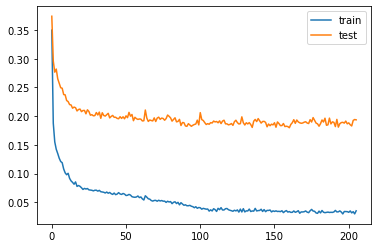

In [434]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(200,activation=activations.relu))
model.add(Dense(60,activation=activations.relu))
model.add(Dense(40))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=500, batch_size=6, validation_data=(X_test, y_test), verbose=0, shuffle=True, callbacks = [stop])
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [435]:
#model.save('model_56vs59')

In [436]:
yhat = model.predict(X_test)

In [ ]:
MSE = 0
column_to_test = 0
for sample in range(X_test.shape[0]):
    MSE += (y_test[sample,column_to_test]-yhat[sample,column_to_test])**2
MSE = MSE/X_test.shape[0]
print("MSE error for model is ", MSE)
MSE = 0
for sample in range(X_test.shape[0]):
    MSE += (y_test[sample,column_to_test]-X_test[sample,-1,column_to_test])**2
MSE = MSE/X_test.shape[0]
print("MSE error for easy standard is ", MSE)


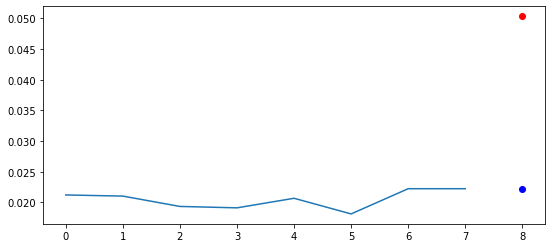

In [453]:
sample = 650
    
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(X_test[sample,:,0])
ax.plot([8],[y_test[sample,0]],'bo')
ax.plot([8],[yhat[sample,0]],'ro')
#X_test[0].plot(ax=ax, label='train')
#X_train[0].plot(ax=ax, label='test')
#prediction = ens.ensembles[num].predict(last_window = data_train[num][param], steps = steps, exog = data_train[num].drop(param, 1))
#prediction.plot(ax=ax, label='predictions')
#count = 0

In [438]:
yhat = model.predict(test_x)
print(yhat)
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_x[:, 1:]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


ValueError: in user code:

    File "C:\Users\csrak\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\csrak\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\csrak\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\csrak\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\csrak\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\csrak\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_41" is incompatible with the layer: expected shape=(None, 8, 40), found shape=(None, 6, 39)


In [ ]:
for i in range(len(data_train)):
    data_train[i].fillna(method='ffill', inplace = True)
for i in range(len(data_train)):
    data_train[i].fillna(method='bfill', inplace = True)
    data_train[i].fillna(0, inplace=True)
data_train[0].info()

In [982]:
x_train.shape

(152, 39)

In [981]:
model = Sequential()
n_neurons = x_train.shape[1] * x_train.shape[2]
model.add(LSTM(n_neurons, return_sequences=False, 
               input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(Dense(1, activation='relu'))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


IndexError: tuple index out of range